In [1]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Import data

In [2]:
topStared=pd.read_csv('data/TopStaredRepositories.csv', sep=",")
commits=pd.read_csv('data/commitsTopStaredRepositories.csv', sep=",")
react=pd.read_csv('data/reactSampleCommits.csv', sep=",")  
toprepo=pd.read_csv('data/topRepositoriesContents.csv', sep=",")

## Data Info

In [3]:
toprepo.head(3)

,owner,repo,fileData(name.size),numFiles,time
0,Alexander-MacDonald,test-repo,[('https://api.github.com/repos/Alexander-MacD...,5,2207.161188
1,twbs,bootstrap,[('https://api.github.com/repos/twbs/bootstrap...,745,83008.044720
2,EbookFoundation,free-programming-books,[('https://api.github.com/repos/EbookFoundatio...,210,7441.006660


In [4]:
toprepo.shape

(978, 5)

In [5]:
toprepo.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   owner                978 non-null    object 
 1   repo                 978 non-null    object 
 2   fileData(name.size)  978 non-null    object 
 3   numFiles             978 non-null    int64  
 4   time                 978 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 38.3+ KB


In [6]:
toprepo.isnull().sum()

owner                  0
repo                   0
fileData(name.size)    0
numFiles               0
time                   0
dtype: int64

###  Unique data

In [7]:
#'Commits Unique values
unique_value_counts = toprepo.nunique()
# Display the number of unique values for each column
print(unique_value_counts)

owner                  813
repo                   971
fileData(name.size)    971
numFiles               617
time                   978
dtype: int64


## Data Cleaning 

In [8]:
toprepo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   owner                978 non-null    object 
 1   repo                 978 non-null    object 
 2   fileData(name.size)  978 non-null    object 
 3   numFiles             978 non-null    int64  
 4   time                 978 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 38.3+ KB


In [9]:
toprepo = toprepo.rename(columns={'fileData(name.size)': 'link'})

In [12]:
temp  = toprepo[:100]
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   owner     100 non-null    object 
 1   repo      100 non-null    object 
 2   link      100 non-null    object 
 3   numFiles  100 non-null    int64  
 4   time      100 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.7+ KB


In [13]:
temp = temp.explode('link')
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   owner     100 non-null    object 
 1   repo      100 non-null    object 
 2   link      100 non-null    object 
 3   numFiles  100 non-null    int64  
 4   time      100 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.7+ KB


In [13]:
exploded_rows = []

# Iterate through each row and each tuple within the 'link' column
for index, row in toprepo.iterrows():
    for link_tuple in row['link']:
        new_row = row.copy()  # Create a copy of the row
        new_row['link'] = link_tuple  # Replace the 'link' value with the tuple
        exploded_rows.append(new_row)  # Append the new row to the list

# Create a new DataFrame from the exploded rows
exploded_df = pd.DataFrame(exploded_rows)

In [ ]:
toprepo.info()

In [18]:
# Converting 'date' column to datetime
react['date'] = pd.to_datetime(react['date'])
react['net_code_change'] = react['additions'] - react['deletions']

# EDA

### React EDA

In [69]:
react.head(3)

,pageNum,pageIndex,owner/repo,author,date,additions,deletions,message,numfiles,[files],net_code_change
0,1,0,facebook/react,gnoff,2023-09-27 23:17:45+00:00,0,1,"Revert ""publish `react-server-dom-turbopack` t...",1,['ReactVersions.js'],-1
1,1,1,facebook/react,gnoff,2023-09-27 17:39:04+00:00,1,0,publish `react-server-dom-turbopack` to canary...,1,['ReactVersions.js'],1
2,1,2,facebook/react,gnoff,2023-09-27 17:03:57+00:00,6733,21,[Flight] Implement `react-server-dom-turbopack...,68,"['.eslintrc.js', 'packages/react-client/src/fo...",6712


In [20]:
react.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15984 entries, 0 to 15983
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   pageNum          15984 non-null  int64              
 1   pageIndex        15984 non-null  int64              
 2   owner/repo       15984 non-null  object             
 3   author           14123 non-null  object             
 4   date             15984 non-null  datetime64[ns, UTC]
 5   additions        15984 non-null  int64              
 6   deletions        15984 non-null  int64              
 7   message          15984 non-null  object             
 8   numfiles         15984 non-null  int64              
 9   [files]          15984 non-null  object             
 10  net_code_change  15984 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(6), object(4)
memory usage: 1.3+ MB


In [21]:
top_author = react['author'].value_counts().head(10)
top_author

author
zpao           1778
gaearon        1667
acdlite        1325
sophiebits     1283
sebmarkbage    1154
jimfb           444
trueadm         436
bvaughn         366
petehunt        331
vjeux           207
Name: count, dtype: int64

In [22]:
top_message = react['message'].value_counts().head(10)
top_message

message
Record sizes                                     21
Prettier                                         13
Fix typo                                          8
Fix lint                                          8
Update changelog                                  8
Update sizes                                      7
Update complementary-tools.md                     7
Updating dependencies for react-noop-renderer     7
Update README.md                                  6
Update CHANGELOG.md                               6
Name: count, dtype: int64

In [23]:
top_message = react['[files]'].value_counts().head(10)
top_message

[files]
['package.json']                                                                                 179
['CHANGELOG.md']                                                                                 164
['docs/docs/tutorial.md']                                                                        155
['README.md']                                                                                    114
['scripts/rollup/results.json']                                                                   56
['docs/docs/05-reusable-components.md']                                                           54
['.circleci/config.yml']                                                                          52
['src/core/ReactCompositeComponent.js', 'src/core/__tests__/ReactCompositeComponent-test.js']     51
['vendor/browser-transforms.js']                                                                  46
['.travis.yml']                                                                    

In [24]:
react['[files]'].nunique()

8468

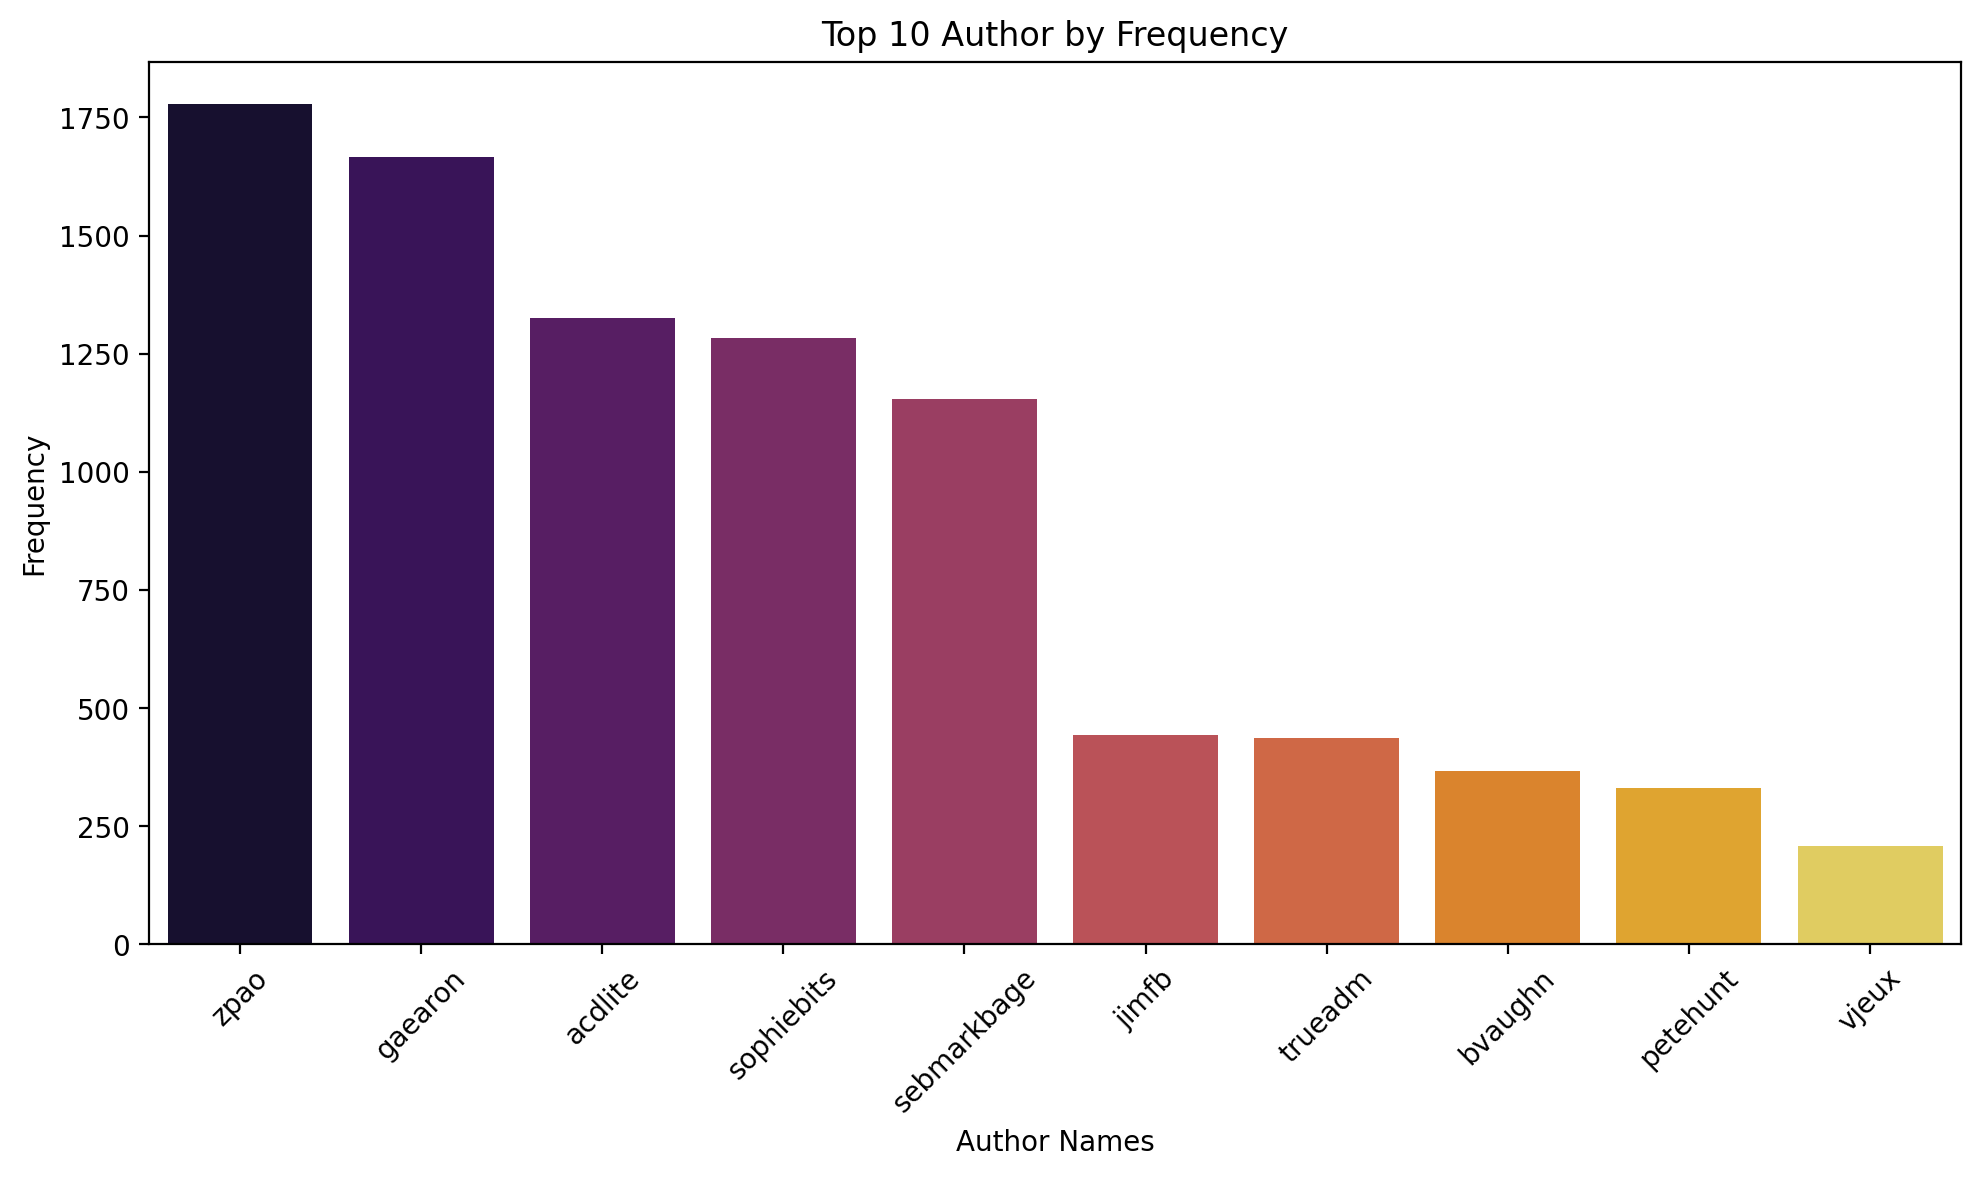

In [25]:
# Assuming 'react' is your DataFrame
top_10_artists = react['author'].value_counts().head(10).reset_index()
top_10_artists.columns = ['Author', 'Frequency']

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Author', y='Frequency', data=top_10_artists, palette="inferno")
plt.xticks(rotation=45)
plt.xlabel('Author Names')
plt.ylabel('Frequency')
plt.title('Top 10 Author by Frequency')
plt.tight_layout()
plt.show()


In [26]:
#react
# Dropping columns that could lead to data leakage
df_react= react.drop(columns=['owner/repo','author', 'date', 'message','[files]'])

In [27]:
df_react.head(2)

,pageNum,pageIndex,additions,deletions,numfiles,net_code_change
0,1,0,0,1,1,-1
1,1,1,1,0,1,1


In [28]:
df_react.describe()

,pageNum,pageIndex,additions,deletions,numfiles,net_code_change
count,15984.00000,15984.000000,15984.000000,15984.000000,15984.000000,15984.000000
mean,80.42042,49.457958,170.243931,101.635073,5.409347,68.608859
std,46.14310,28.850431,1590.465913,1117.465805,17.468773,1752.407619
min,1.00000,0.000000,0.000000,0.000000,0.000000,-63303.000000
25%,40.00000,24.000000,2.000000,1.000000,1.000000,0.000000
50%,80.00000,49.000000,14.000000,4.000000,2.000000,3.000000
75%,120.00000,74.000000,70.000000,25.000000,4.000000,34.000000
max,160.00000,99.000000,68507.000000,63526.000000,300.000000,68507.000000


In [29]:
corr = df_react.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,pageNum,pageIndex,additions,deletions,numfiles,net_code_change
pageNum,1.000000,-0.002513,-0.032425,-0.030517,-0.090257,-0.009969
pageIndex,-0.002513,1.000000,-0.002635,0.003686,0.009158,-0.004742
additions,-0.032425,-0.002635,1.000000,0.199005,0.427722,0.780689
deletions,-0.030517,0.003686,0.199005,1.000000,0.350799,-0.457060
numfiles,-0.090257,0.009158,0.427722,0.350799,1.000000,0.164500
net_code_change,-0.009969,-0.004742,0.780689,-0.457060,0.164500,1.000000


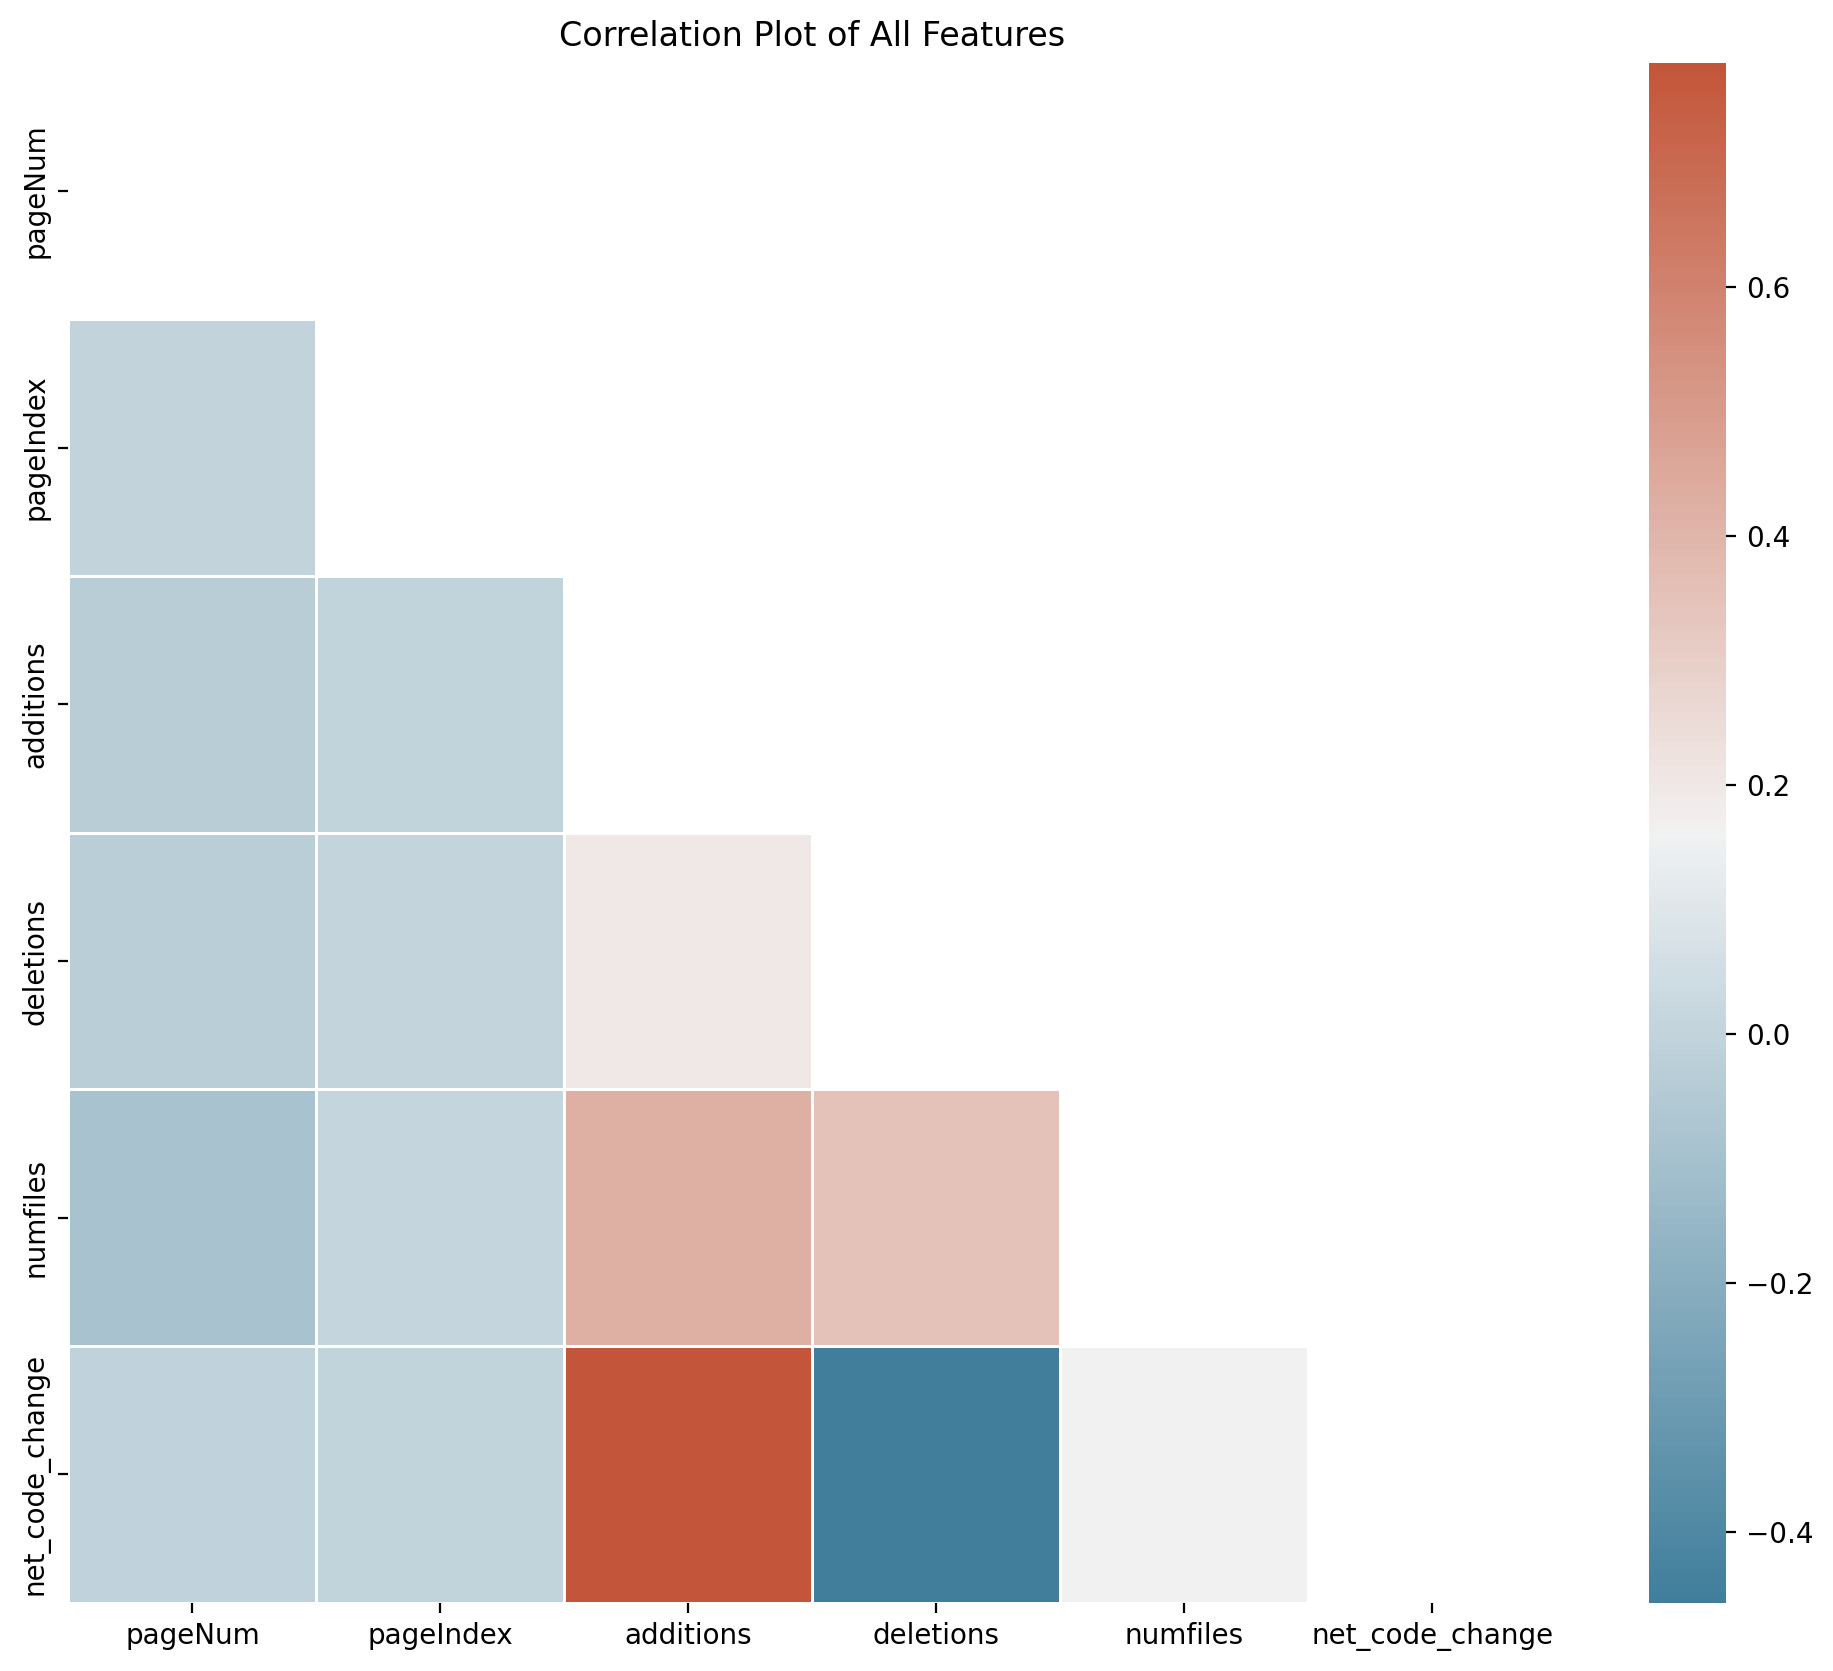

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for all numerical features in your DataFrame
corr = df_react.corr()

# Set up the matplotlib figure and adjust its size
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)

plt.title('Correlation Plot of All Features')
plt.show()



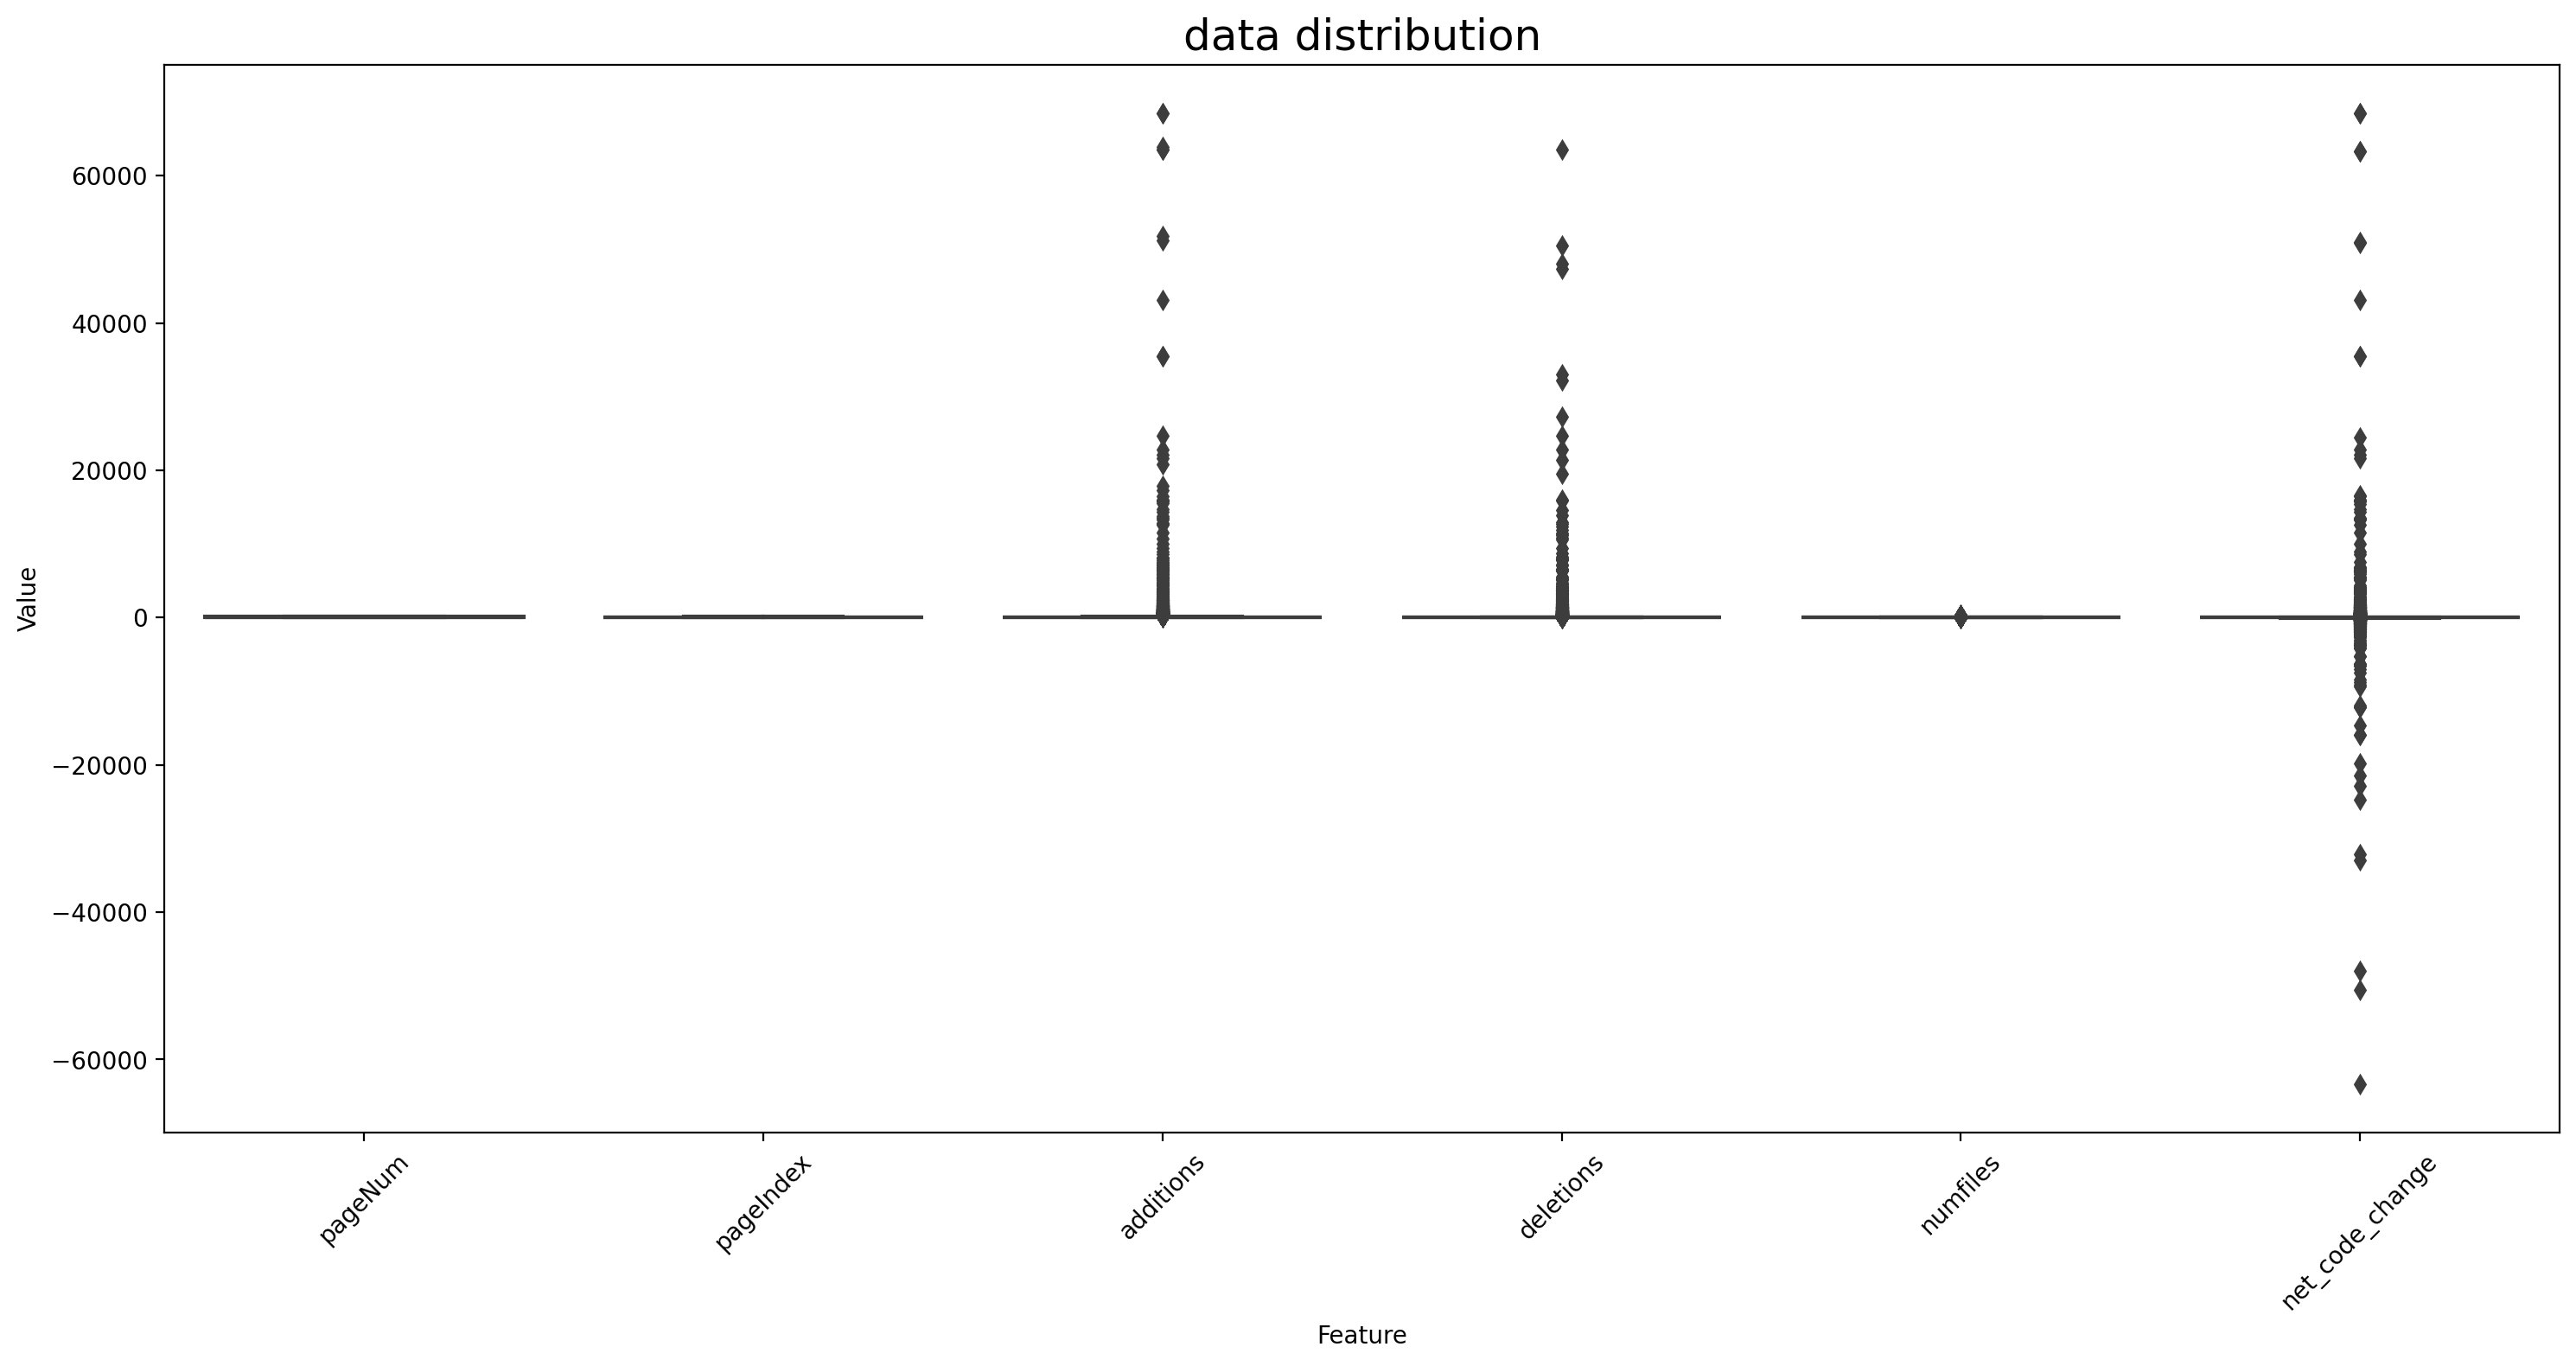

In [31]:
df_num_dis= df_react

# Stacking the data for a single box plot
stacked_data = df_num_dis.melt(var_name='Feature', value_name='Value')

# Create a single box plot
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
sns.boxplot(data=stacked_data, x='Feature', y='Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('data distribution',size=18)
plt.tight_layout()
plt.show()


{'bodies': [<matplotlib.collections.PolyCollection at 0x22c5d870f10>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x22c5d870e80>,
 'cmins': <matplotlib.collections.LineCollection at 0x22c5d884640>,
 'cbars': <matplotlib.collections.LineCollection at 0x22c5d884a00>}

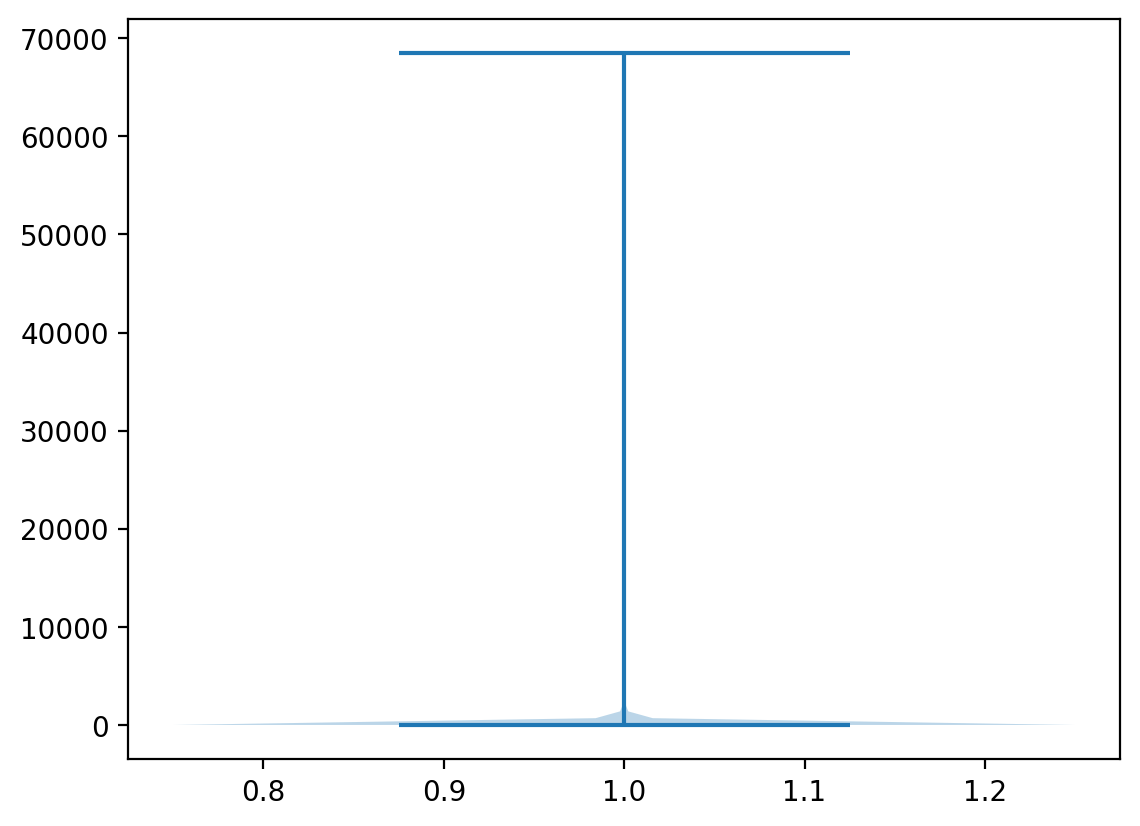

In [32]:
plt.violinplot(df_react['additions'])

In [33]:
df_react.describe()


,pageNum,pageIndex,additions,deletions,numfiles,net_code_change
count,15984.00000,15984.000000,15984.000000,15984.000000,15984.000000,15984.000000
mean,80.42042,49.457958,170.243931,101.635073,5.409347,68.608859
std,46.14310,28.850431,1590.465913,1117.465805,17.468773,1752.407619
min,1.00000,0.000000,0.000000,0.000000,0.000000,-63303.000000
25%,40.00000,24.000000,2.000000,1.000000,1.000000,0.000000
50%,80.00000,49.000000,14.000000,4.000000,2.000000,3.000000
75%,120.00000,74.000000,70.000000,25.000000,4.000000,34.000000
max,160.00000,99.000000,68507.000000,63526.000000,300.000000,68507.000000


#### React - removing Outliers 

In [34]:
df_react.columns

Index(['pageNum', 'pageIndex', 'additions', 'deletions', 'numfiles',
       'net_code_change'],
      dtype='object')

In [35]:
import scipy.stats
import numpy as np

# Assuming the functions z_score_removal and percentile_removal are already defined as given in the previous code.

def z_score_removal(df, column, lower_z_score, upper_z_score):
    col_df = df[column]
    
    z_scores = scipy.stats.zscore(col_df)
    outliers = (z_scores > upper_z_score) | (z_scores < lower_z_score)
    return df[~outliers]

def percentile_removal(df, column, lower_bound_perc, upper_bound_perc):
    col_df = df[column]
    
    upper_bound = np.percentile(col_df, upper_bound_perc)
    lower_bound = np.percentile(col_df, lower_bound_perc)
    
    outliers = (col_df > upper_bound) | (col_df < lower_bound)
    return df[~outliers]

filtered_df_zscore= z_score_removal(df_react, 'additions', -1.96, 1.96)
filtered_df_zscore = z_score_removal(filtered_df_zscore, 'deletions', -1.96, 1.96)



filtered_df_percentile = percentile_removal(df_react, 'additions', lower_bound_perc=1, upper_bound_perc=99)
filtered_df_percentile = percentile_removal(filtered_df_percentile, 'deletions', lower_bound_perc=1, upper_bound_perc=99)


In [36]:
filtered_df_percentile.head()

,pageNum,pageIndex,additions,deletions,numfiles,net_code_change
0,1,0,0,1,1,-1
1,1,1,1,0,1,1
3,1,3,1021,288,48,733
4,1,4,1710,689,11,1021
5,1,5,380,53,3,327


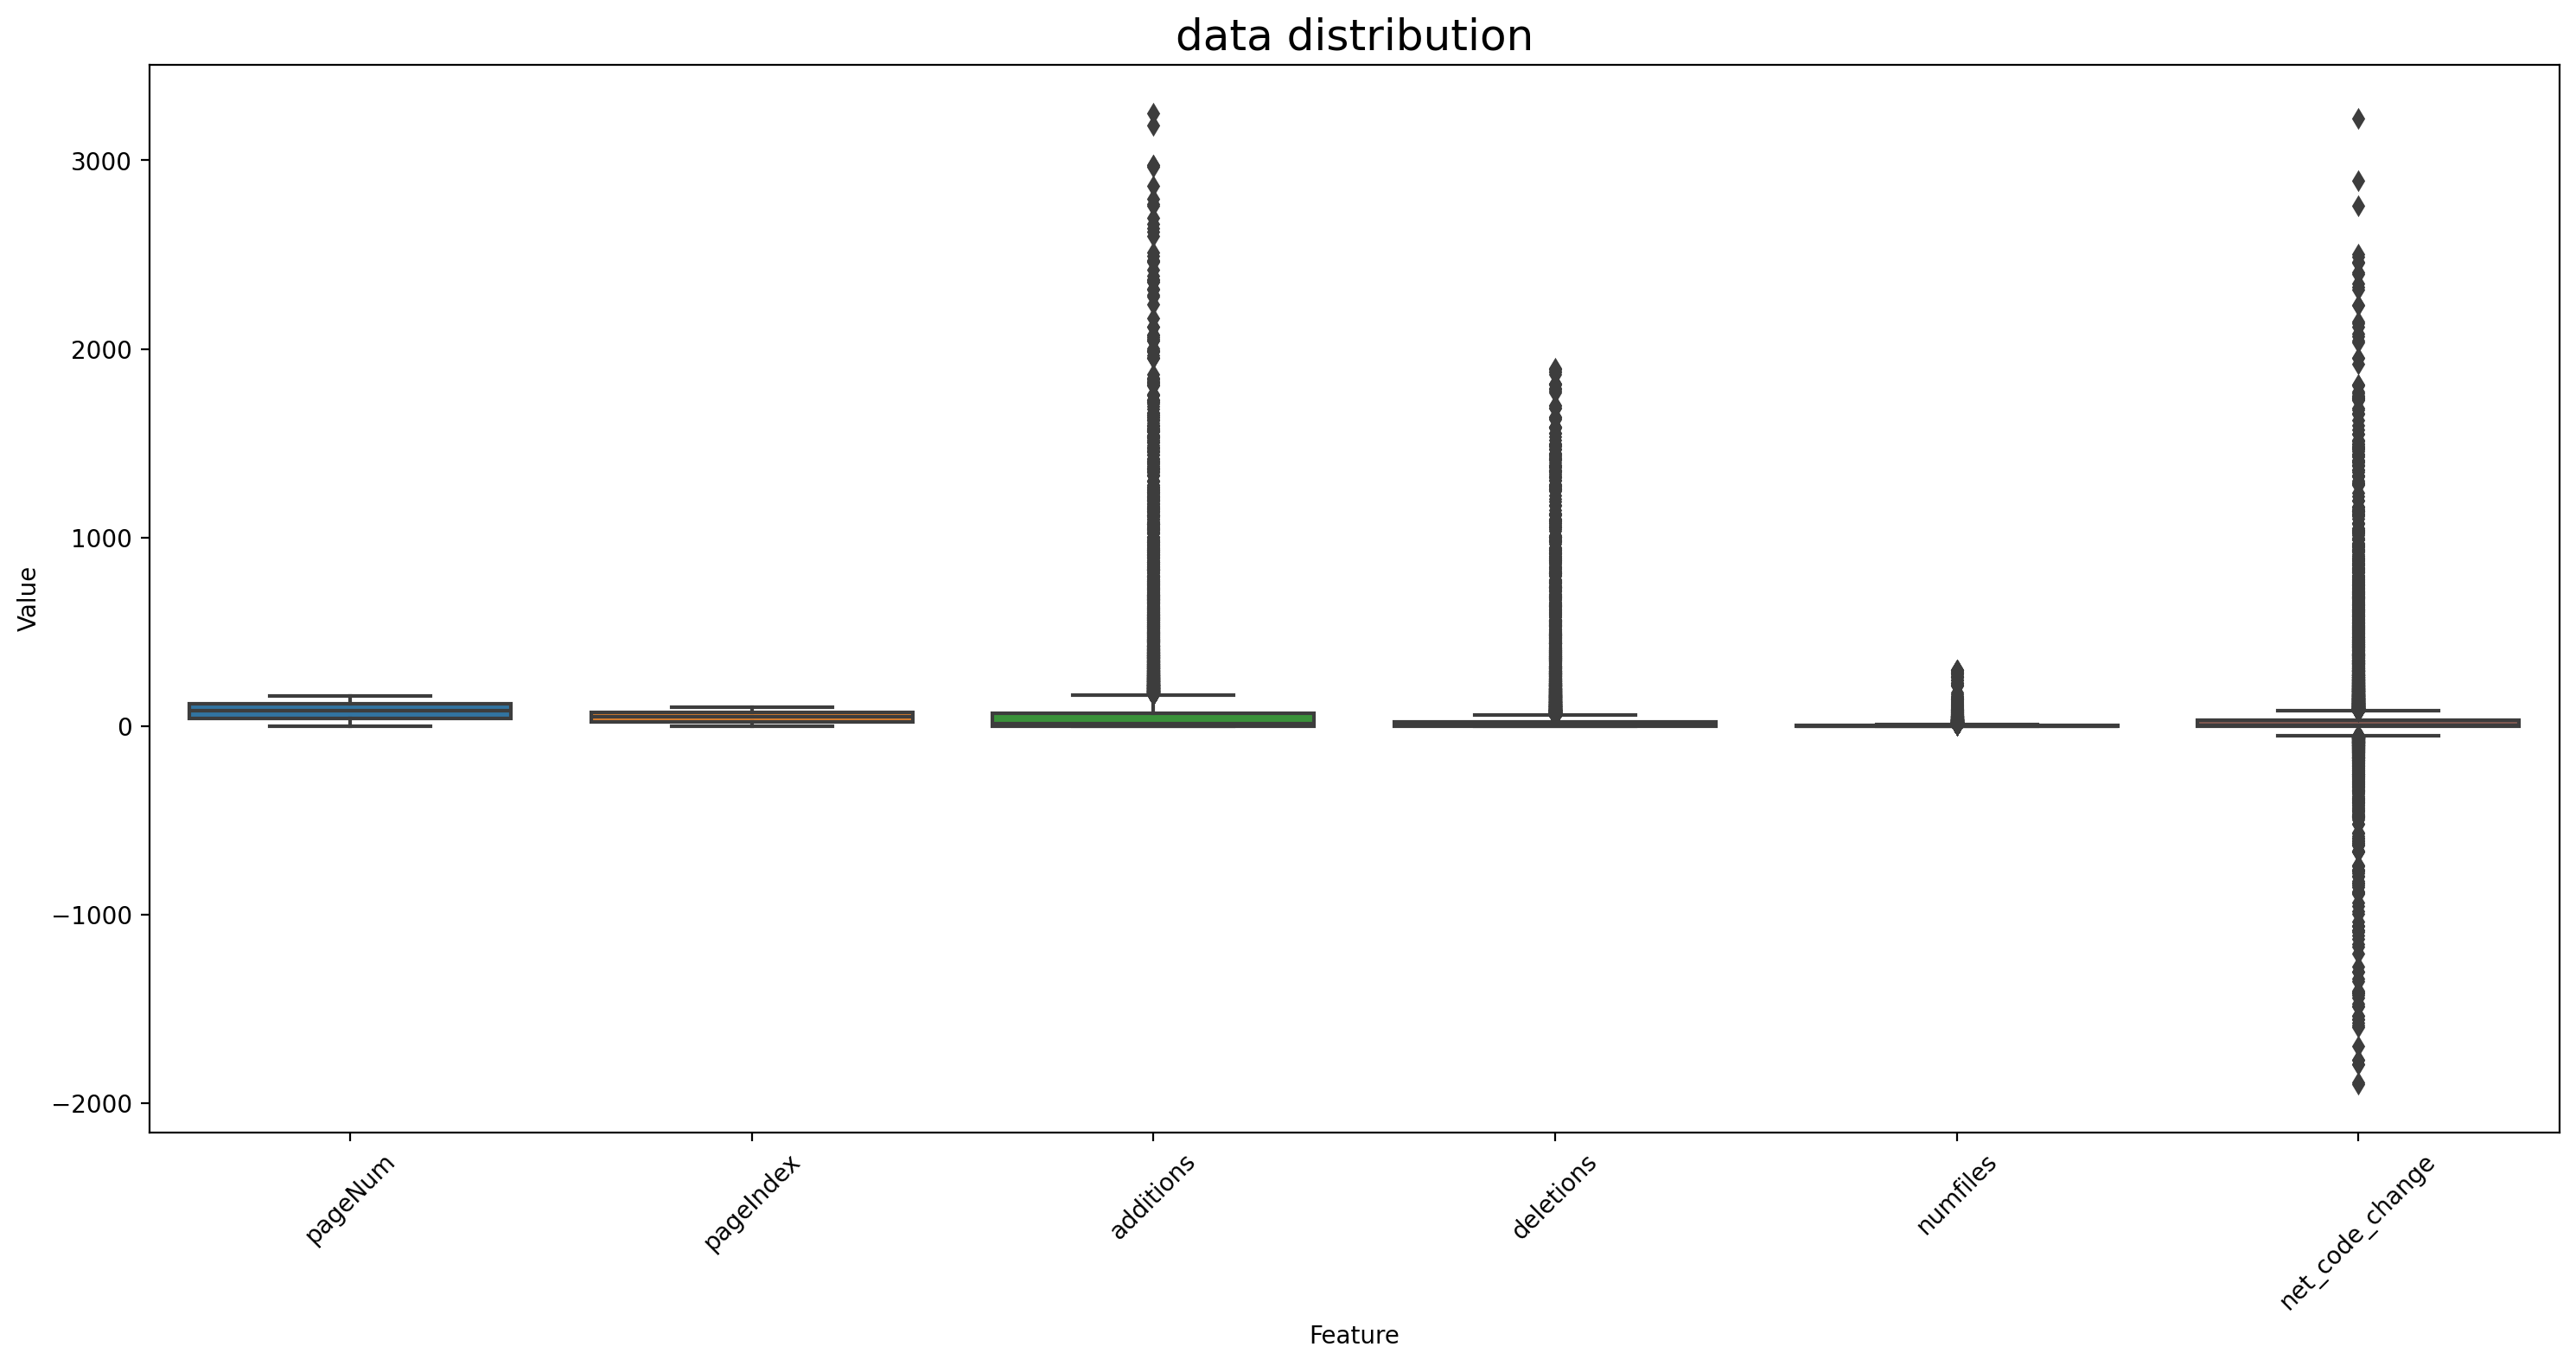

In [37]:
df_num_dis= filtered_df_zscore

# Stacking the data for a single box plot
stacked_data = df_num_dis.melt(var_name='Feature', value_name='Value')

# Create a single box plot
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
sns.boxplot(data=stacked_data, x='Feature', y='Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('data distribution',size=18)
plt.tight_layout()
plt.show()


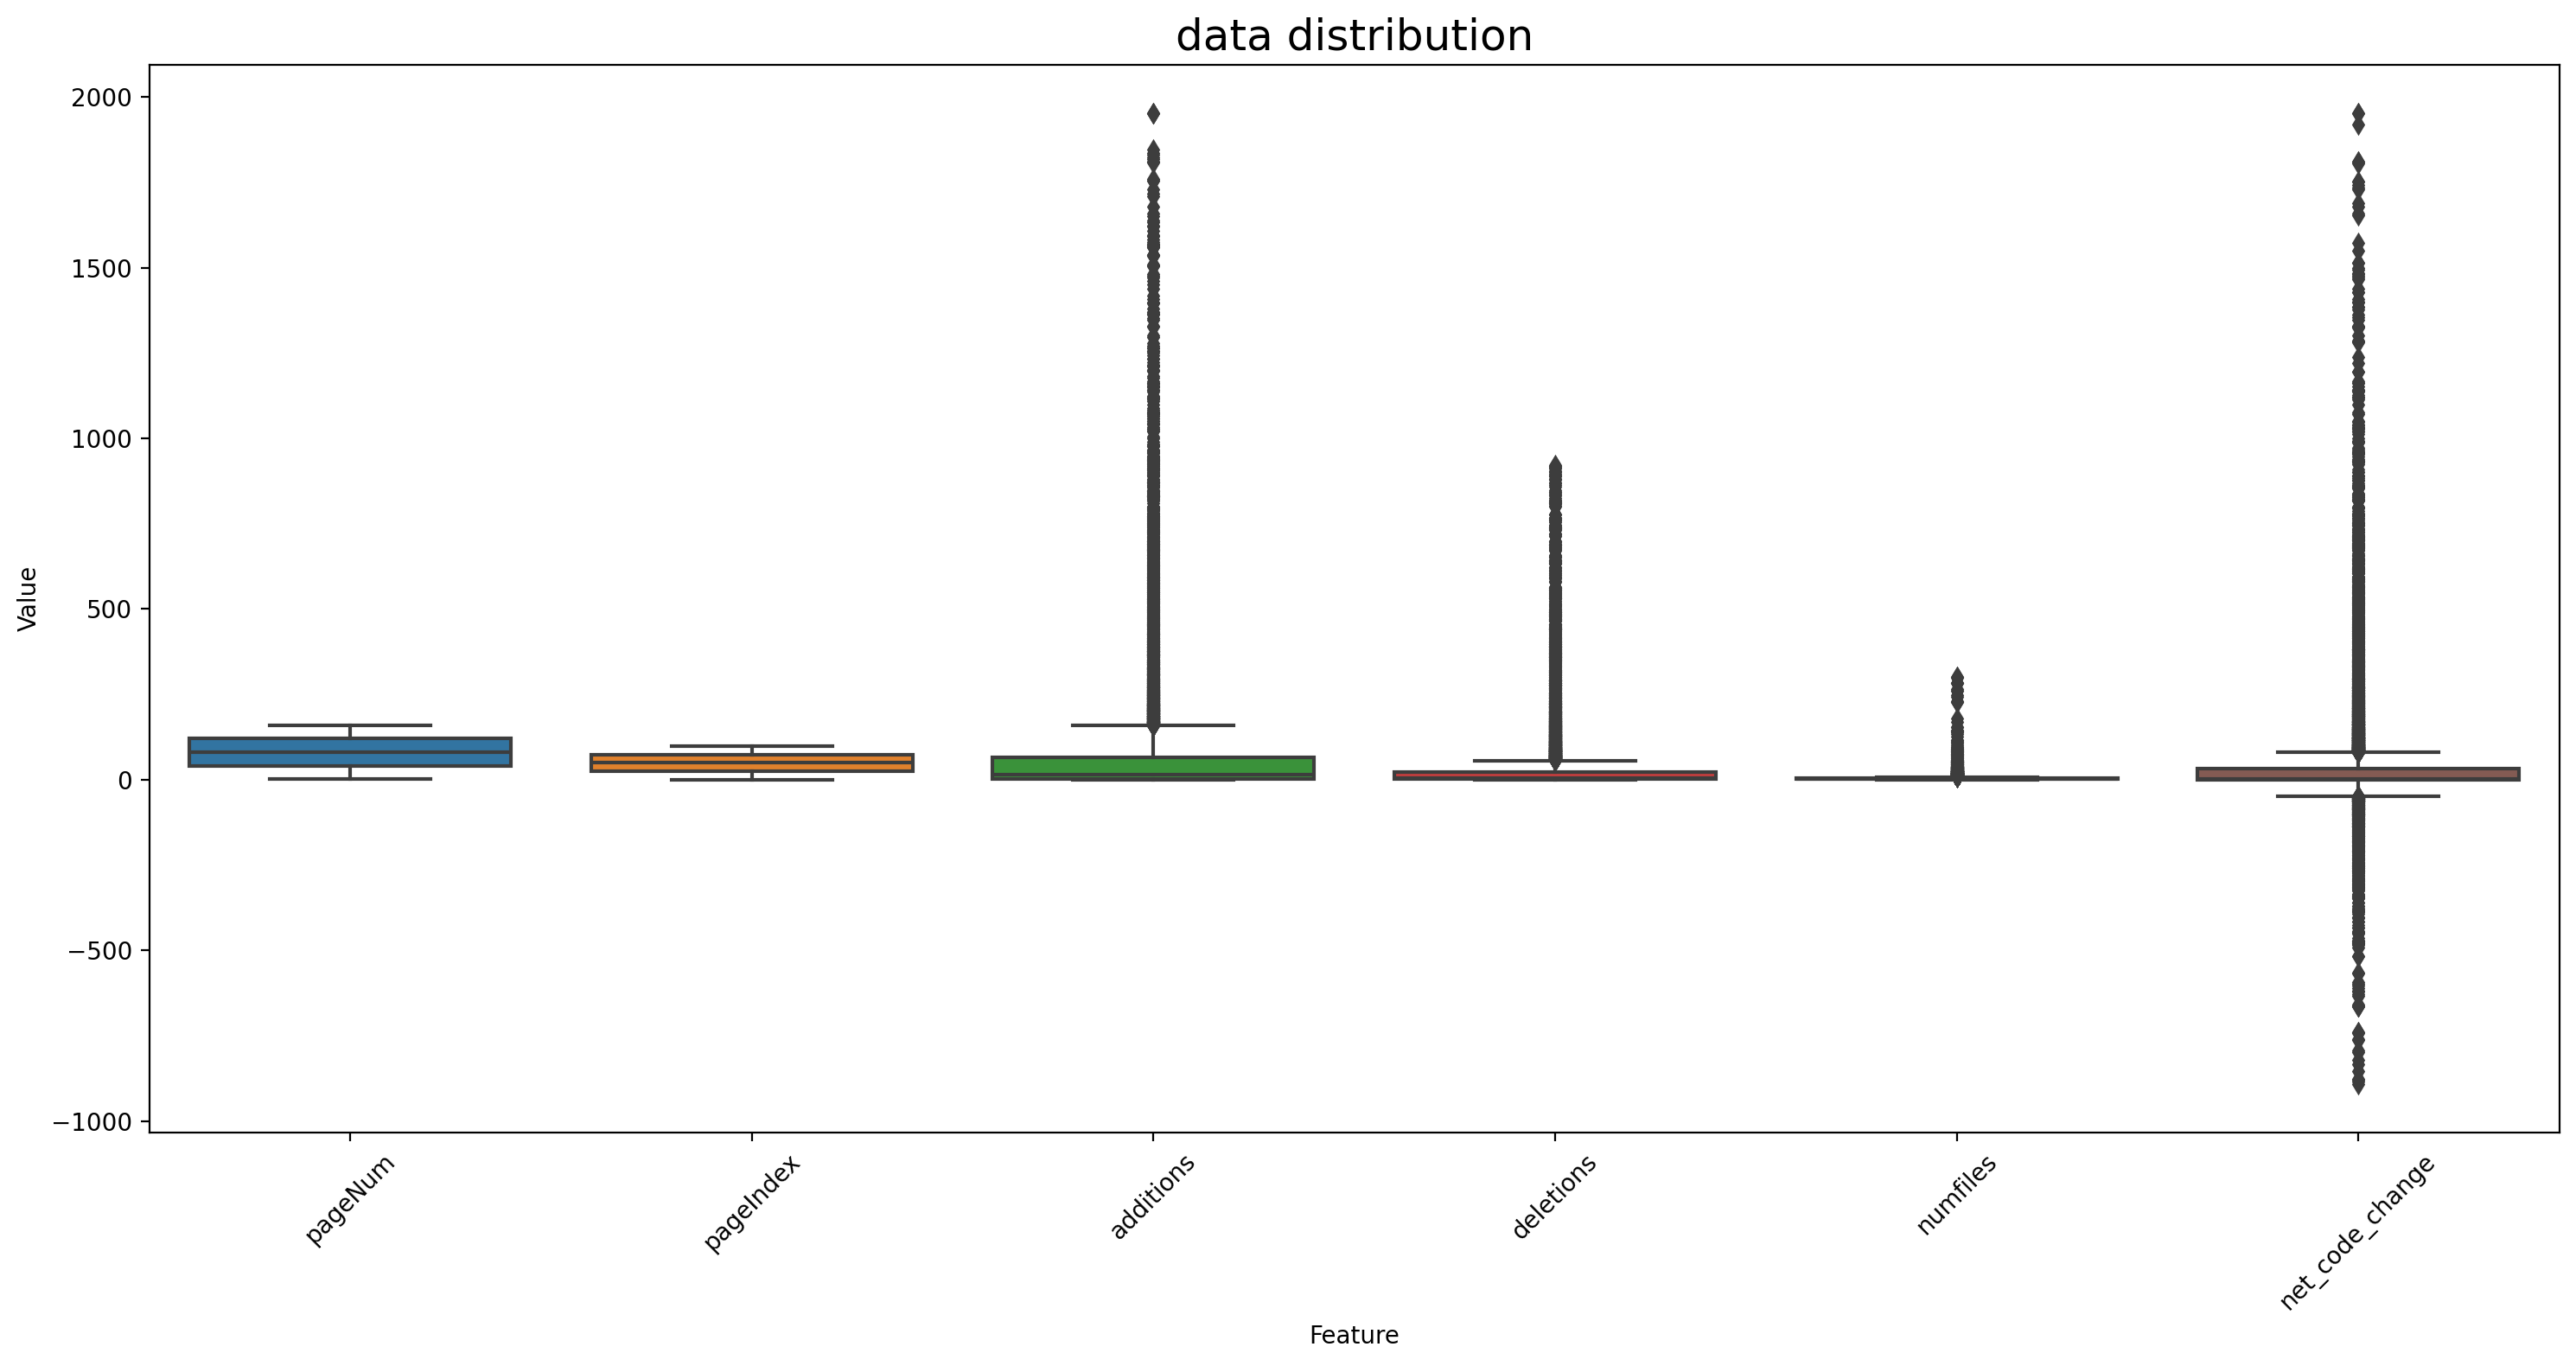

In [38]:
df_num_dis= filtered_df_percentile

# Stacking the data for a single box plot
stacked_data = df_num_dis.melt(var_name='Feature', value_name='Value')

# Create a single box plot
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
sns.boxplot(data=stacked_data, x='Feature', y='Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('data distribution',size=18)
plt.tight_layout()
plt.show()

In [39]:
filtered_df_zscore.head()

,pageNum,pageIndex,additions,deletions,numfiles,net_code_change
0,1,0,0,1,1,-1
1,1,1,1,0,1,1
3,1,3,1021,288,48,733
4,1,4,1710,689,11,1021
5,1,5,380,53,3,327


In [40]:
#IsolationForest

In [41]:
from sklearn.ensemble import IsolationForest

features = ['pageNum', 'pageIndex', 'additions', 'deletions', 'numfiles']

## We'll do a simple drop null for now
df = df_react.dropna()

## Create a training-test set
X = df[features]
X_train = X[:12000]  # Adjusting the training set size
X_test = X[1000:]    # It seems there might be an indexing issue here; it's assuming X[1000:] is the test set, let's adjust this.

## Fit Model
clf = IsolationForest(n_estimators=50, max_samples=100)
clf.fit(X_train)

## Get Scores
df['scores'] = clf.decision_function(X)
df['anomaly'] = clf.predict(X)

## Get Anomalies
outliers = df.loc[df['anomaly'] == -1]

outliers

,pageNum,pageIndex,additions,deletions,numfiles,net_code_change,scores,anomaly
2,1,2,6733,21,68,6712,-0.201458,-1
3,1,3,1021,288,48,733,-0.213129,-1
4,1,4,1710,689,11,1021,-0.200246,-1
5,1,5,380,53,3,327,-0.053180,-1
6,1,6,27,10,8,17,-0.023678,-1
...,...,...,...,...,...,...,...,...
15904,160,4,108,9,6,99,-0.009457,-1
15912,160,12,109,0,4,109,-0.009287,-1
15913,160,13,109,0,4,109,-0.011229,-1
15955,160,55,52,226,5,-174,-0.045751,-1


In [42]:
outliers = outliers.reset_index(drop=True)

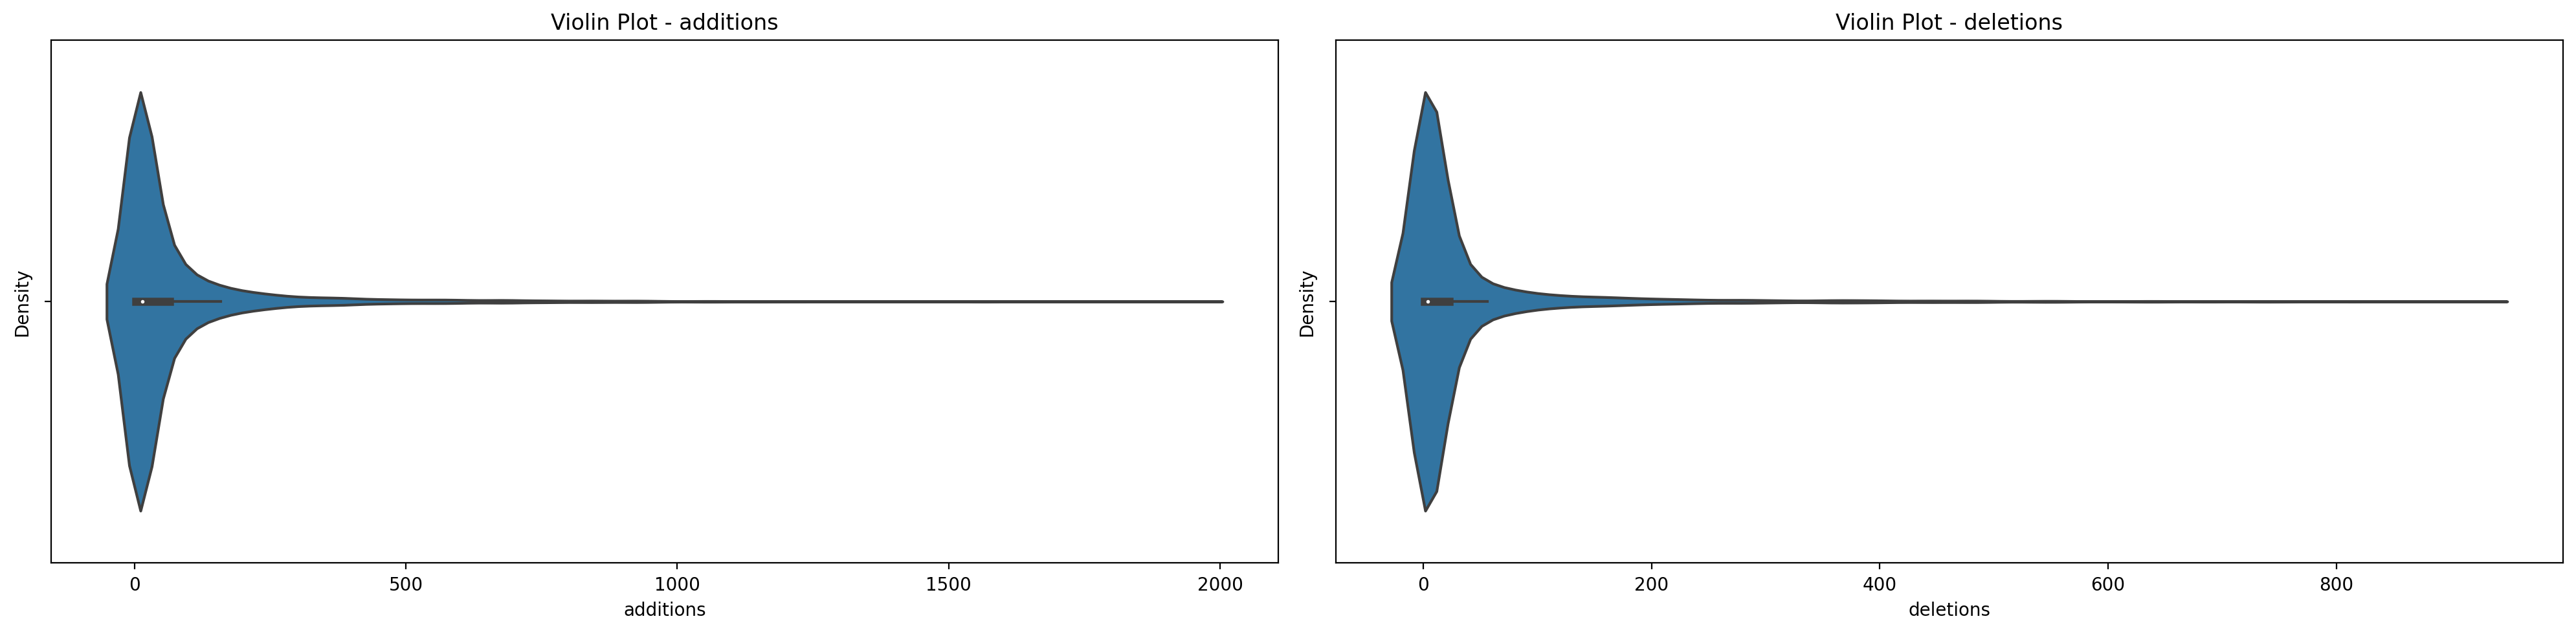

In [43]:
# Create a figure and multiple subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))  # Five subplots for five violin plots

# Plot multiple violin plots
sns.violinplot(x=df_num_dis["additions"], ax=axes[0])
axes[0].set_title('Violin Plot - additions')
axes[0].set_xlabel('additions')
axes[0].set_ylabel('Density')

sns.violinplot(x=df_num_dis["deletions"], ax=axes[1])
axes[1].set_title('Violin Plot - deletions')
axes[1].set_xlabel('deletions')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [44]:
react.head(3)

,pageNum,pageIndex,owner/repo,author,date,additions,deletions,message,numfiles,[files],net_code_change
0,1,0,facebook/react,gnoff,2023-09-27 23:17:45+00:00,0,1,"Revert ""publish `react-server-dom-turbopack` t...",1,['ReactVersions.js'],-1
1,1,1,facebook/react,gnoff,2023-09-27 17:39:04+00:00,1,0,publish `react-server-dom-turbopack` to canary...,1,['ReactVersions.js'],1
2,1,2,facebook/react,gnoff,2023-09-27 17:03:57+00:00,6733,21,[Flight] Implement `react-server-dom-turbopack...,68,"['.eslintrc.js', 'packages/react-client/src/fo...",6712


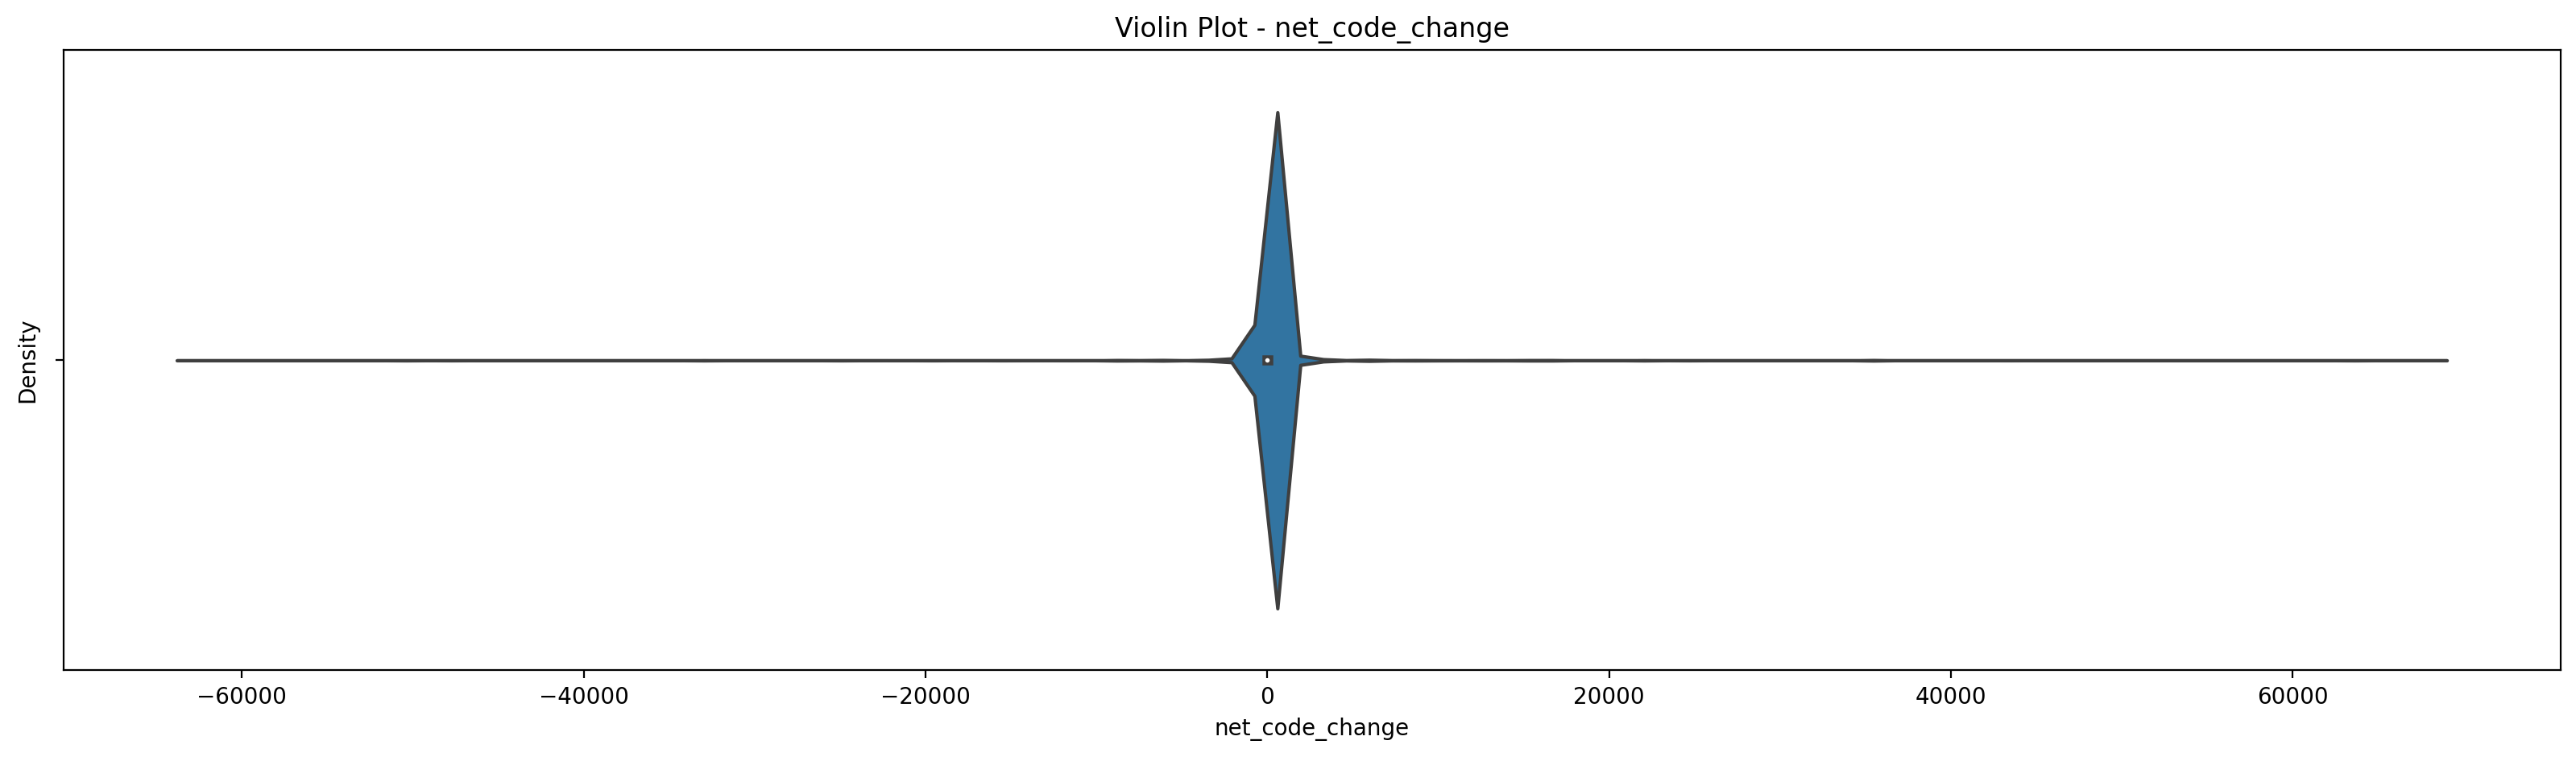

In [45]:
# Create a figure and multiple subplots
fig, axes = plt.subplots(1, 1, figsize=(20, 5))  # Single subplot for a single violin plot

# Plot a single violin plot
sns.violinplot(x=react["net_code_change"], ax=axes)
axes.set_title('Violin Plot - net_code_change')
axes.set_xlabel('net_code_change')
axes.set_ylabel('Density')

# Display the plot
plt.show()

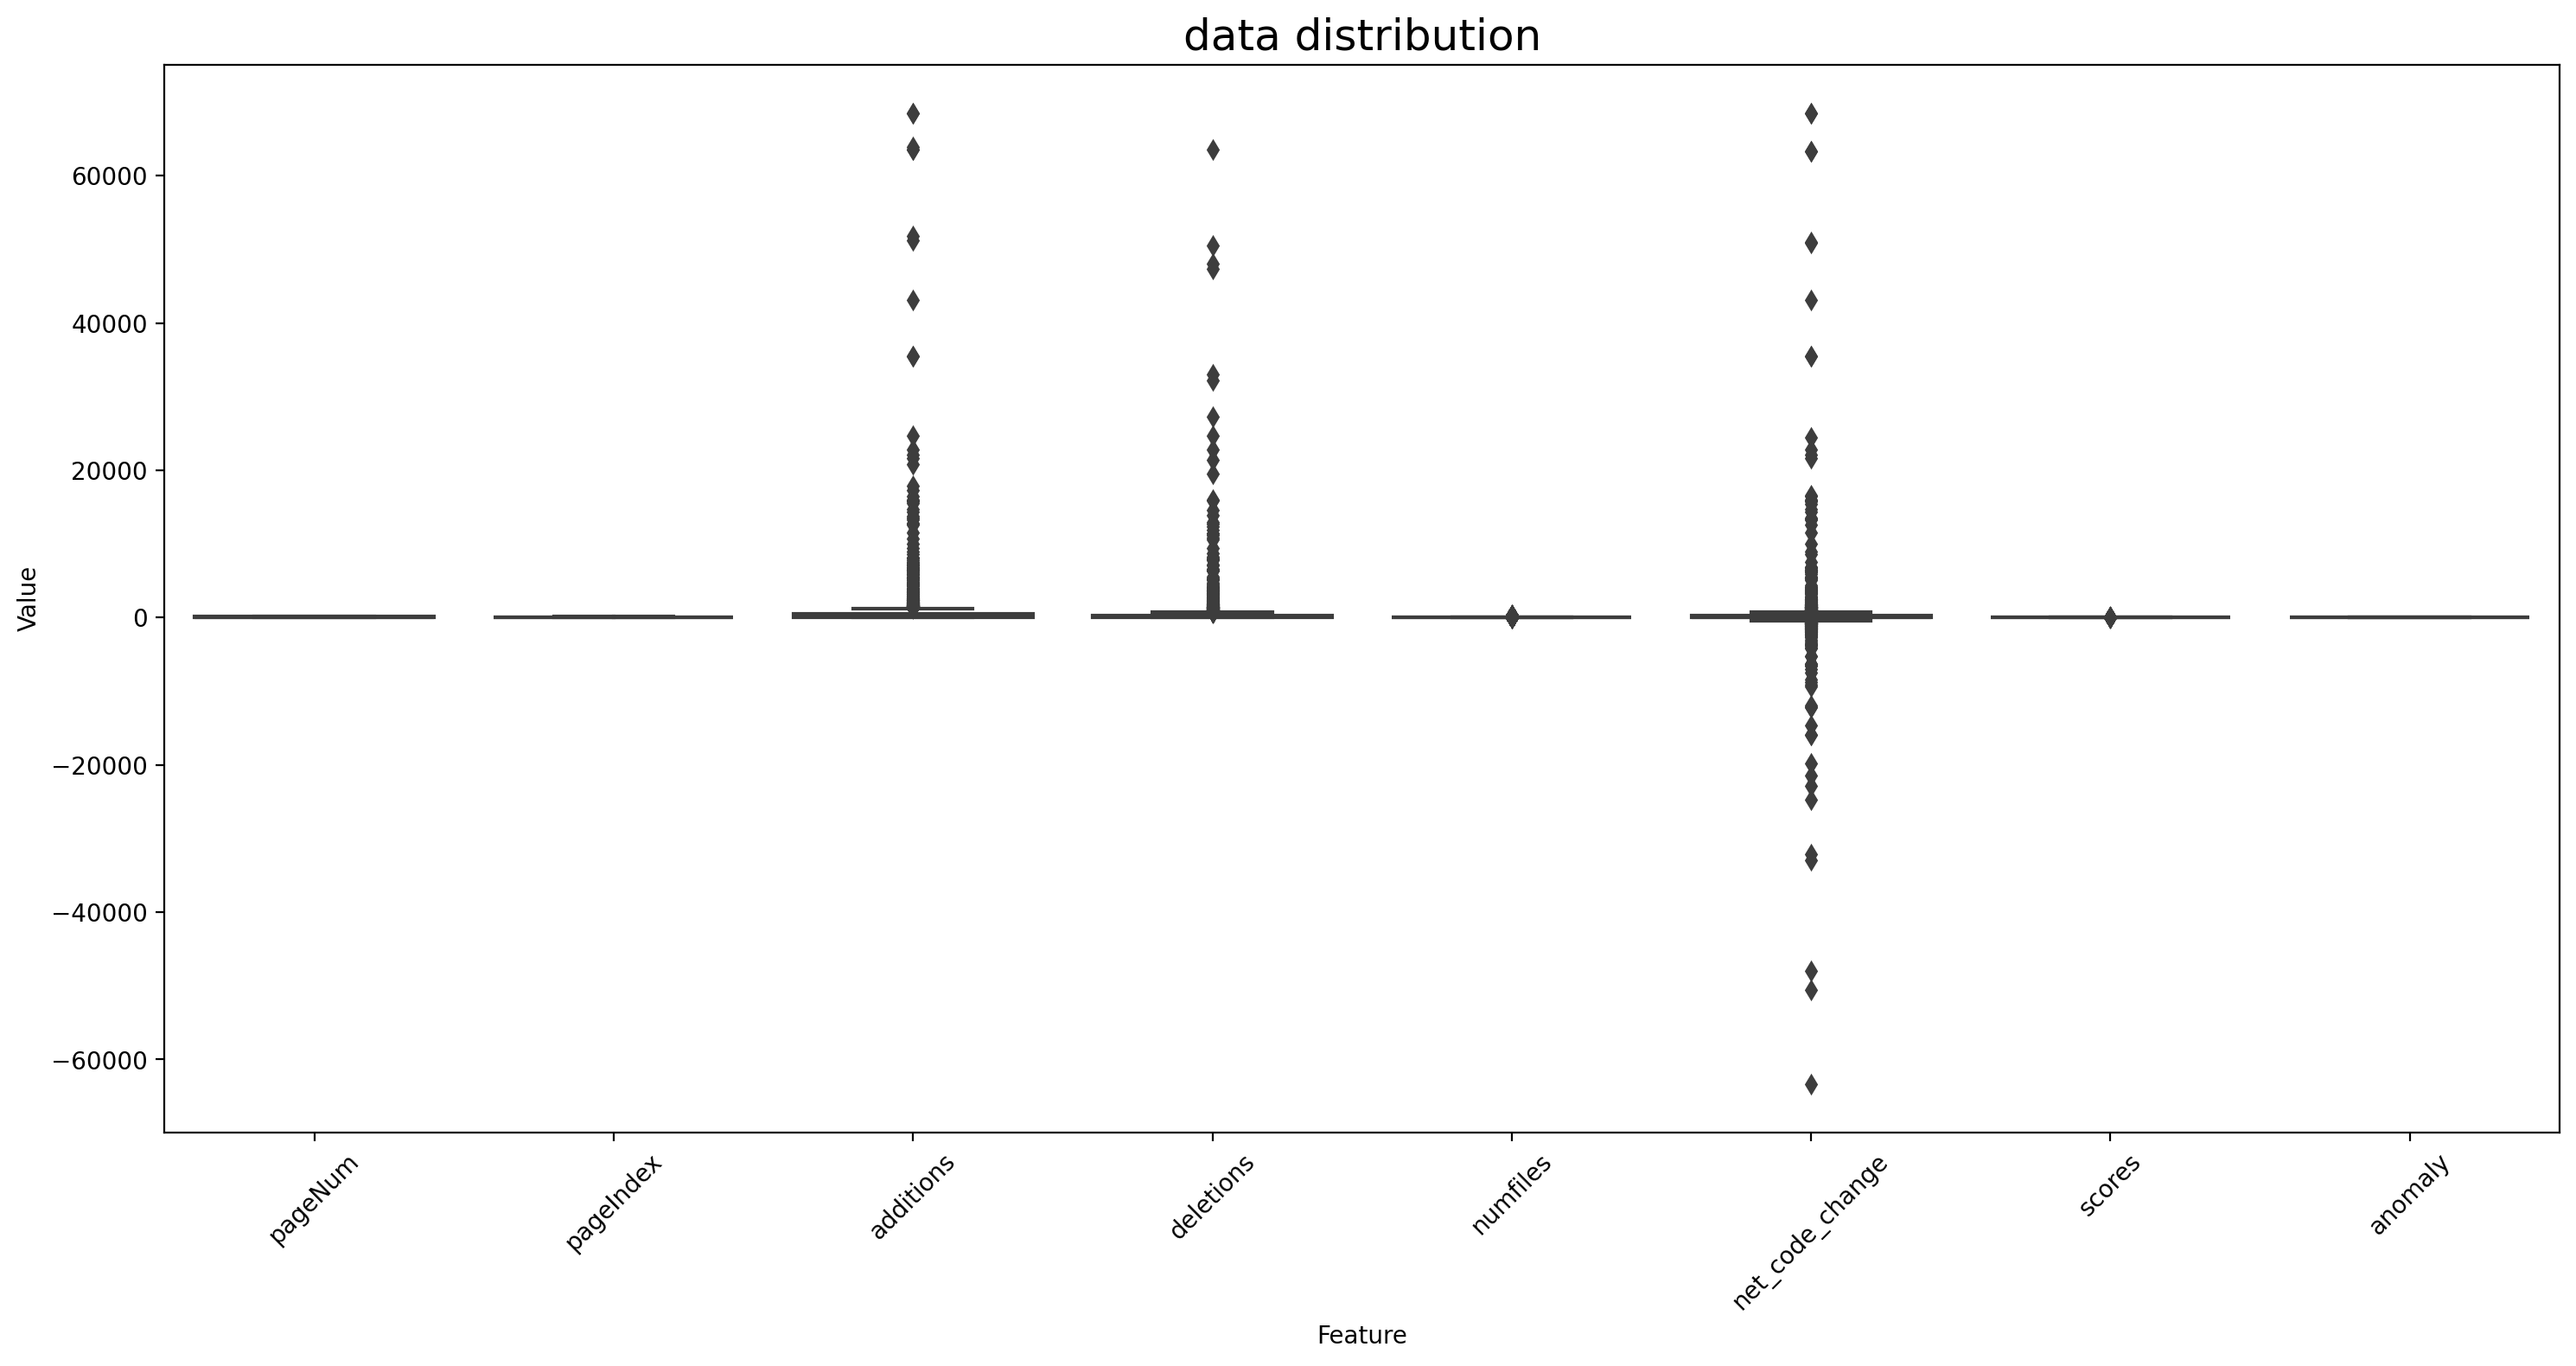

In [46]:
df_num_dis= outliers

# Stacking the data for a single box plot
stacked_data = df_num_dis.melt(var_name='Feature', value_name='Value')

# Create a single box plot
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
sns.boxplot(data=stacked_data, x='Feature', y='Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('data distribution',size=18)
plt.tight_layout()
plt.show()


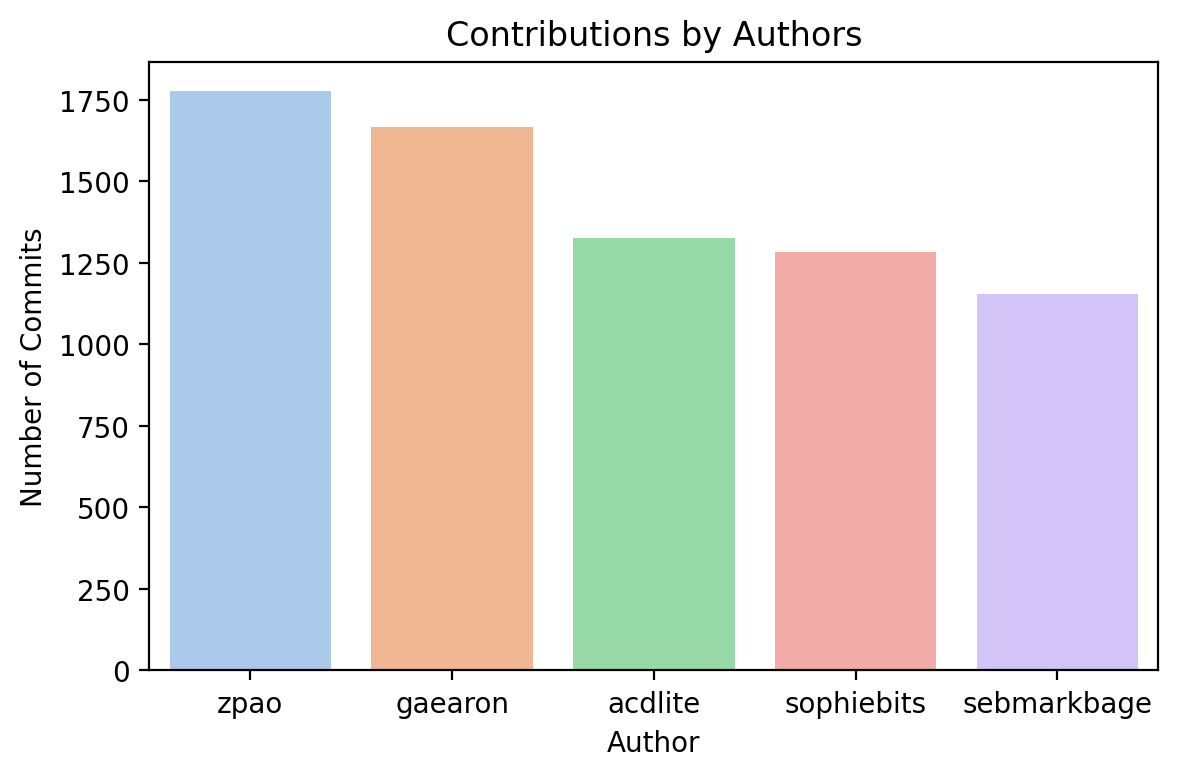

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(x='author', data=react,order=pd.value_counts(react['author']).iloc[:5].index, palette='pastel')
plt.title('Contributions by Authors')
plt.xlabel('Author')
plt.ylabel('Number of Commits')
plt.tight_layout()
plt.show()

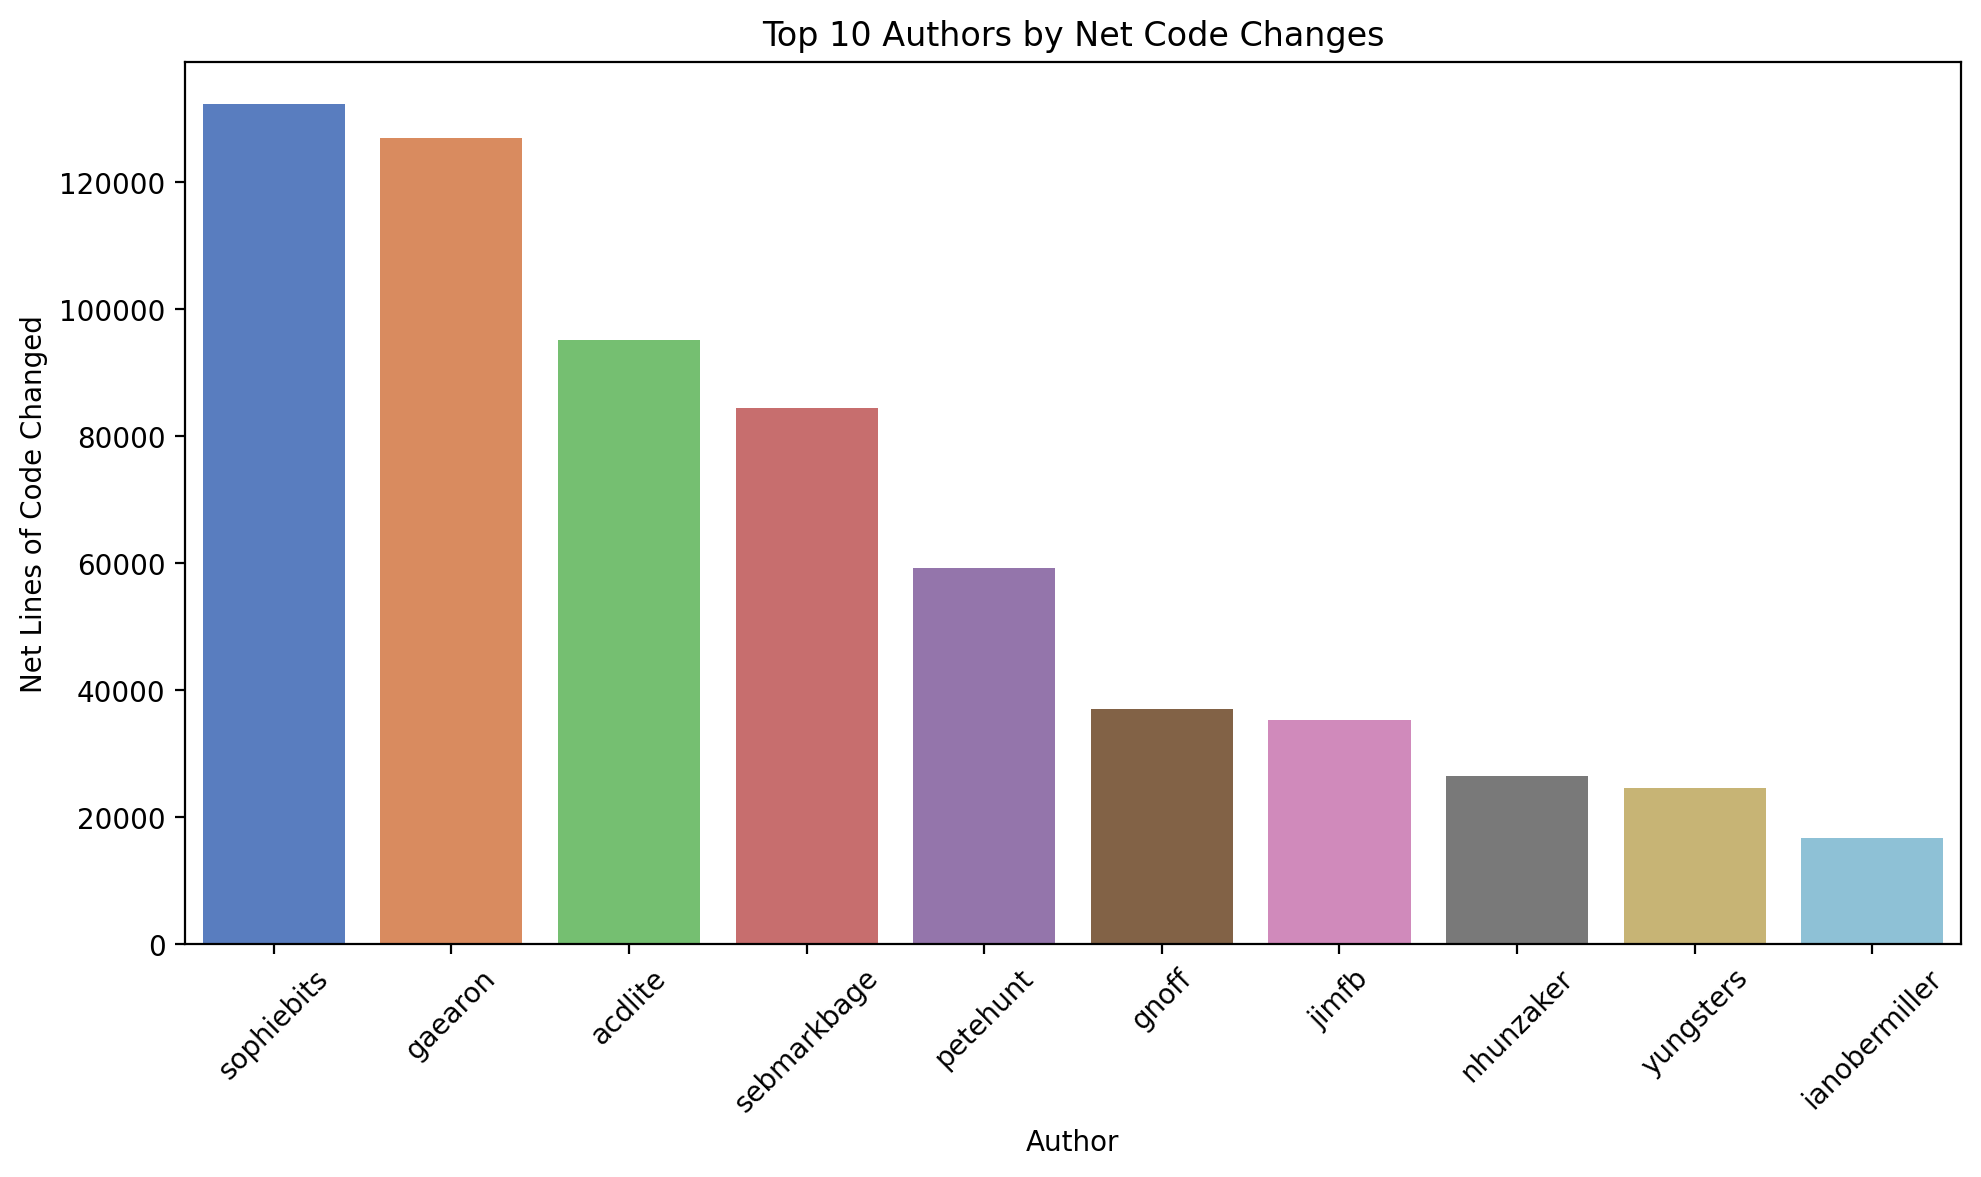

In [48]:
# Group by author and sum up the net code changes
author_net = react.groupby('author')['net_code_change'].sum().reset_index()
author_net = author_net.nlargest(10, 'net_code_change')

# Plotting the top 10 authors by net code changes
plt.figure(figsize=(10, 6))
sns.barplot(x='author', y='net_code_change', data=author_net, palette='muted')
plt.title('Top 10 Authors by Net Code Changes')
plt.xlabel('Author')
plt.ylabel('Net Lines of Code Changed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
file_changes = react.groupby('[files]')['net_code_change'].sum().reset_index()
file_changes = file_changes.sort_values(by='net_code_change', ascending=False)
file_changes.head()


,[files],net_code_change
430,"['Gruntfile.js', 'docs/js/JSXTransformer.js', ...",70896
1630,"['extension/.circleci/config.yml', 'extension/...",68507
13,"['.circleci/config.yml', '.eslintignore', '.es...",68507
15,"['.circleci/config.yml', '.eslintignore', '.gi...",63303
596,"['docs/_config.yml', 'docs/_includes/nav_docs....",50929


##### Net Commit Changes Over Time for Top Authors

In [64]:
author_changes = react.groupby(['author', pd.Grouper(key='date', freq='D')])['net_code_change'].sum().reset_index()
#top authors based on total net code change
top_authors = author_changes.groupby('author')['net_code_change'].sum().nlargest(3).index
# Filtering data 
top_author_changes = author_changes[author_changes['author'].isin(top_authors)]
# Pivoting data to have authors as columns
pivot_table = top_author_changes.pivot(index='date', columns='author', values='net_code_change').fillna(0)


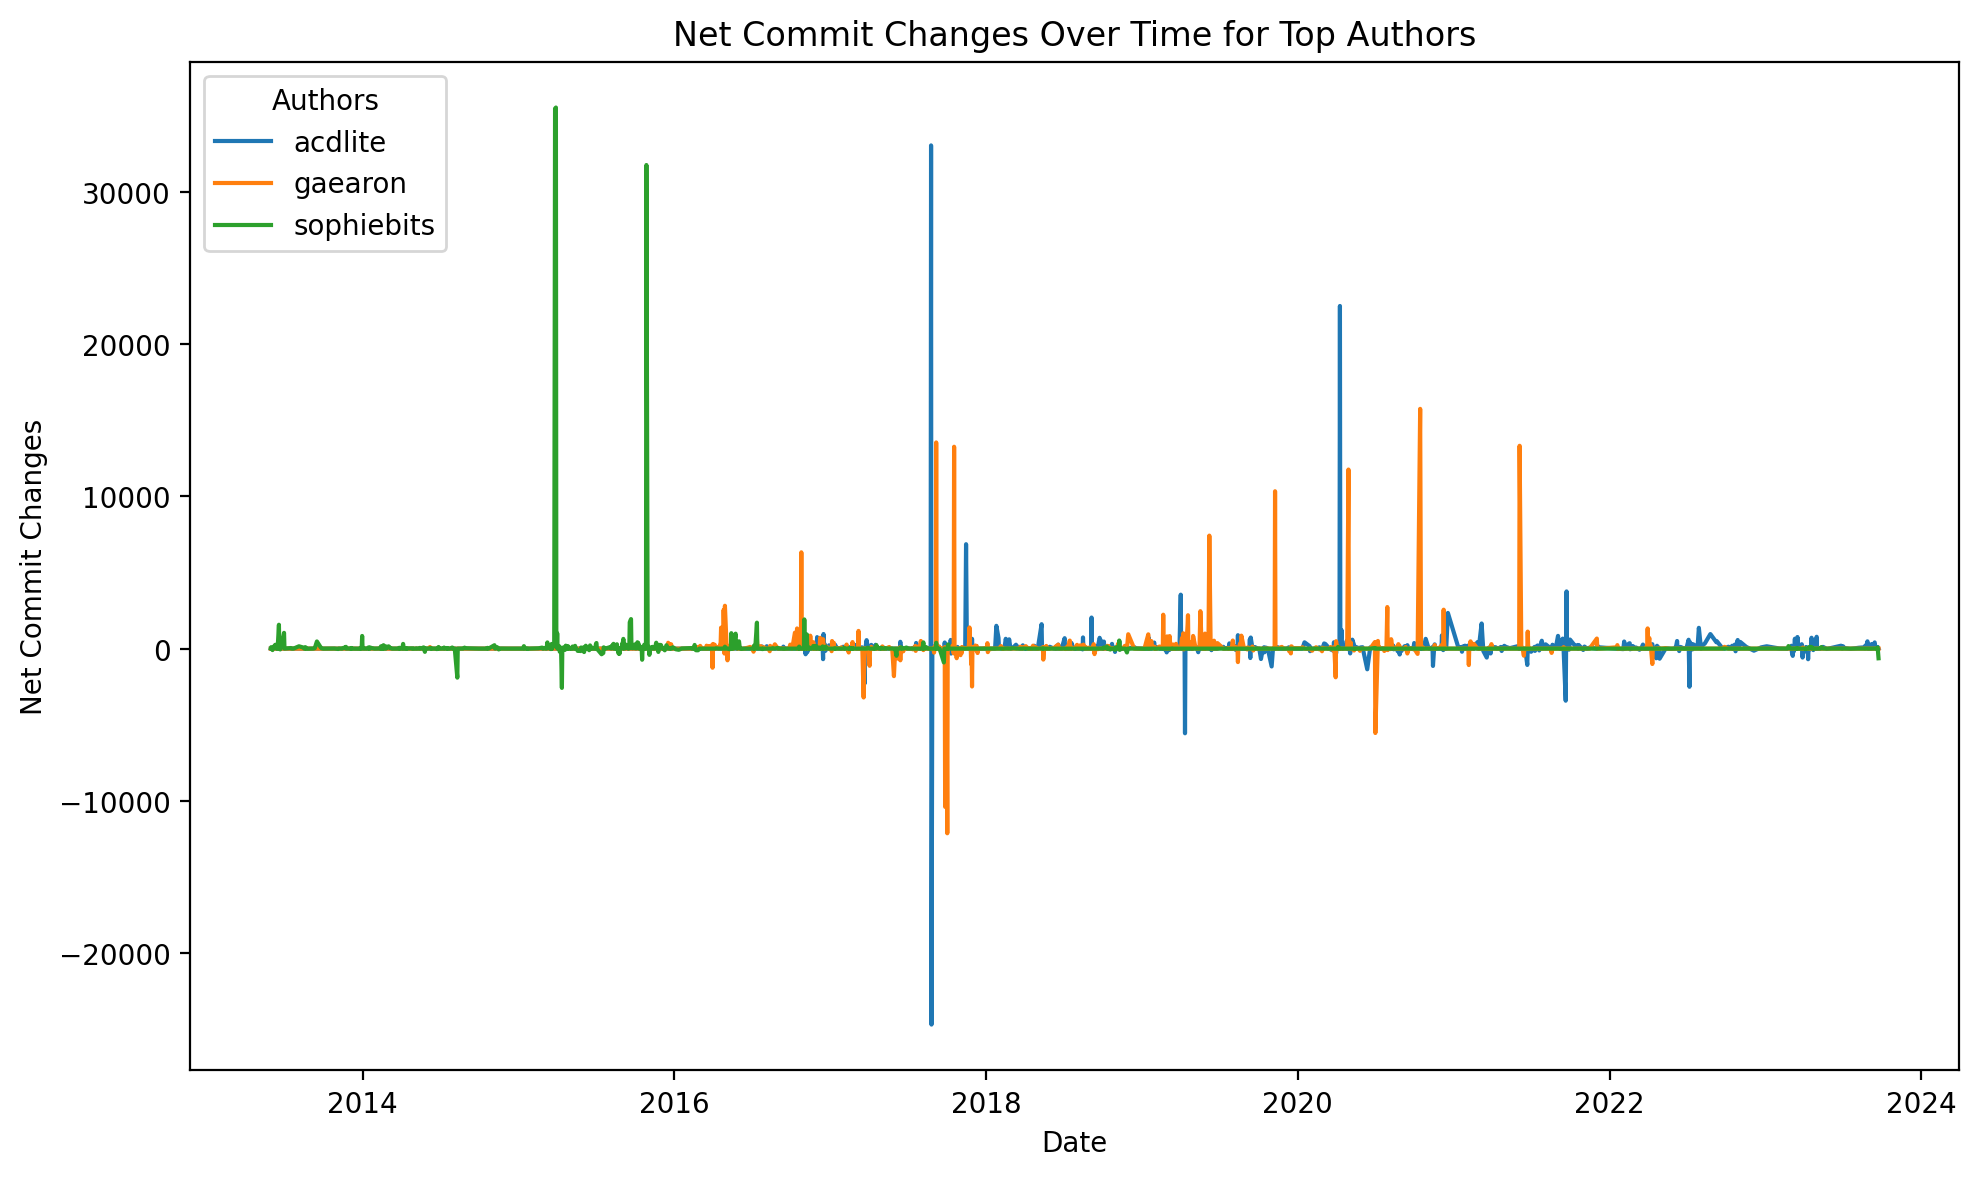

In [66]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_table, dashes=False)
plt.xlabel('Date')
plt.ylabel('Net Commit Changes')
plt.title('Net Commit Changes Over Time for Top Authors')
plt.legend(title='Authors', loc='upper left')
plt.tight_layout()
plt.show()